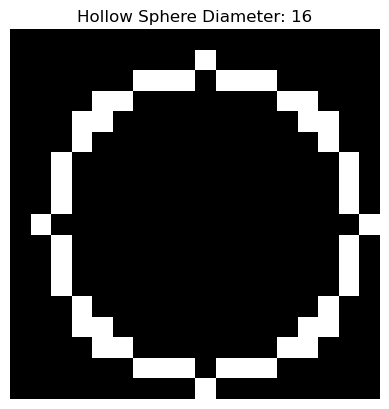

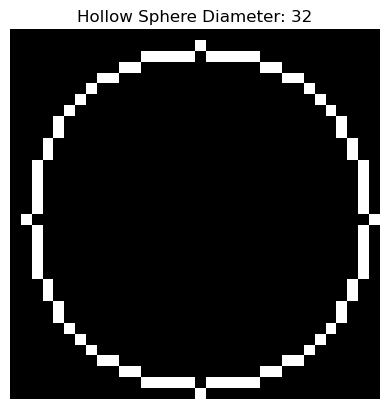

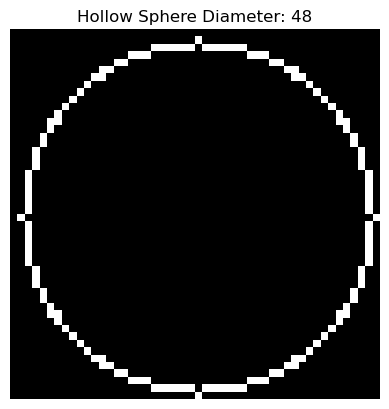

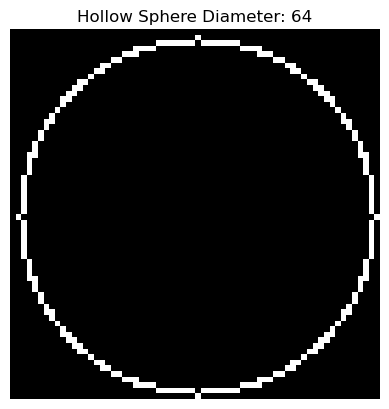

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion, binary_dilation

def create_hollow_sphere(diameter):
    # Create a binary sphere
    radius = diameter // 2
    size = diameter + 2  # Add extra space for boundary effects
    center = size // 2

    # Create a 3D grid
    x, y, z = np.indices((size, size, size))
    distance = np.sqrt((x - center)**2 + (y - center)**2 + (z - center)**2)
    
    # Define the sphere
    sphere = (distance <= radius).astype(int)
    
    # Create hollow effect by applying erosion
    inner_radius = radius - 1
    inner_sphere = (distance <= inner_radius).astype(int)
    hollow_sphere = sphere - inner_sphere
    
    return hollow_sphere

def plot_sphere_slice(hollow_sphere, diameter):
    fig, ax = plt.subplots()
    
    # Find a slice through the center
    slice_index = hollow_sphere.shape[0] // 2
    slice_2d = hollow_sphere[slice_index, :, :]
    
    # Plot the 2D slice
    ax.imshow(slice_2d, cmap='gray')
    ax.set_title(f'Hollow Sphere Diameter: {diameter}')
    ax.axis('off')

    plt.show()

def generate_and_plot_spheres(min_diameter, max_diameter, step):
    for diameter in range(min_diameter, max_diameter + 1, step):
        hollow_sphere = create_hollow_sphere(diameter)
        plot_sphere_slice(hollow_sphere, diameter)

# Generate and plot hollow spheres with diameters from 16 to 64 pixels
generate_and_plot_spheres(16, 64, 16)


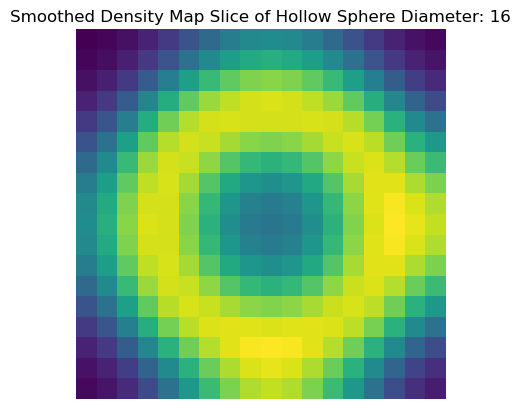

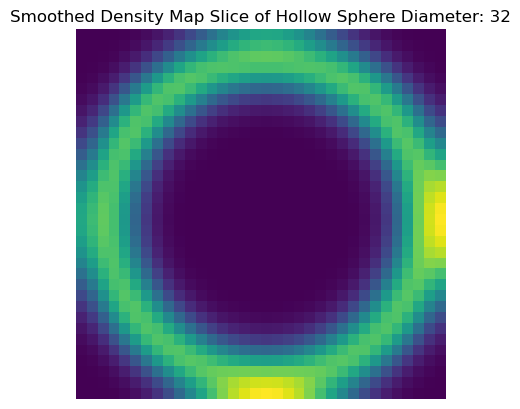

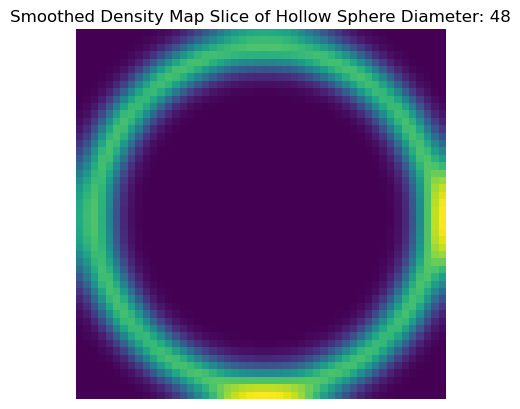

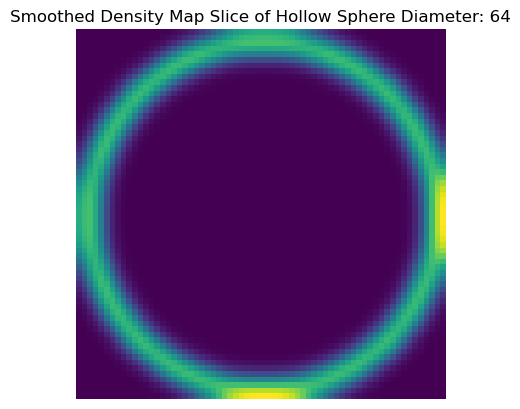

: 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def create_density_map(diameter, density=1.0):
    radius = diameter // 2
    size = diameter + 2  # Add extra space for boundary effects
    center = size // 2

    # Create a 3D grid
    x, y, z = np.indices((size, size, size))
    distance = np.sqrt((x - center)**2 + (y - center)**2 + (z - center)**2)
    
    # Define the sphere
    outer_sphere = (distance <= radius).astype(float)
    inner_radius = radius - 1
    inner_sphere = (distance <= inner_radius).astype(float)
    
    # Create hollow sphere by subtracting the inner sphere from the outer sphere
    hollow_sphere = outer_sphere - inner_sphere
    
    # Apply a constant density
    density_map = hollow_sphere * density
    
    return density_map

def smooth_density_map(density_map, sigma=2.0):
    # Apply Gaussian filter to smooth the density map
    smoothed_map = gaussian_filter(density_map, sigma=sigma)
    return smoothed_map

def plot_density_slice(density_map, diameter):
    fig, ax = plt.subplots()
    
    # Find a slice through the center
    slice_index = density_map.shape[0] // 2 +4
    slice_2d = density_map[slice_index, :, :]
    
    # Plot the 2D slice
    ax.imshow(slice_2d, cmap='viridis')
    ax.set_title(f'Smoothed Density Map Slice of Hollow Sphere Diameter: {diameter}')
    ax.axis('off')

    plt.show()

def generate_and_plot_density_maps(min_diameter, max_diameter, step, sigma):
    for diameter in range(min_diameter, max_diameter + 1, step):
        density_map = create_density_map(diameter)
        smoothed_map = smooth_density_map(density_map, sigma=sigma)
        plot_density_slice(smoothed_map, diameter)

# Generate and plot smoothed density maps for hollow spheres with diameters from 16 to 64 pixels
generate_and_plot_density_maps(16, 64, 16, sigma=2.0)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from mpl_toolkits.mplot3d import Axes3D

def generate_3d_volume(nGrid=64):
    X, Y, Z = np.meshgrid(np.linspace(-(nGrid-1)/2, (nGrid-1)/2, nGrid), np.linspace(-(nGrid-1)/2, (nGrid-1)/2, nGrid), np.linspace(-(nGrid-1)/2, (nGrid-1)/2, nGrid))
    QP = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T
    
    P0 = np.random.rand() * 10 + 20
    P1 = np.random.rand() * 2.5 + 2.5
    tipX, tipY, tipZ = sphere(100)
    tipX = tipX.ravel() * P1
    tipY = tipY.ravel() * P1
    tipZ = tipZ.ravel() * P1
    print(tipX[50])
    T = np.vstack([np.column_stack([tipX - P0/2, tipY, tipZ]),
                   np.column_stack([tipX + P0/2, tipY, tipZ]),
                   np.column_stack([tipX, tipY + P0/2*np.sqrt(3), tipZ])])
    
    T[:, 1] -= P0/2*np.sqrt(3)/3
    S = Delaunay(T)
    indexIntersect = np.isfinite(S.find_simplex(QP))
    print(indexIntersect)
    mask = indexIntersect.reshape((nGrid, nGrid, nGrid)).astype(float)
    return mask-1

def rand_rot_3D(vertices):
    t = np.random.rand() * 360
    RZ1 = np.array([[np.cos(np.deg2rad(t)), -np.sin(np.deg2rad(t)), 0],
                    [np.sin(np.deg2rad(t)), np.cos(np.deg2rad(t)), 0],
                    [0, 0, 1]])
    t = np.random.rand() * 360
    RX = np.array([[1, 0, 0],
                   [0, np.cos(np.deg2rad(t)), -np.sin(np.deg2rad(t))],
                   [0, np.sin(np.deg2rad(t)), np.cos(np.deg2rad(t))]])
    t = np.random.rand() * 360
    RZ2 = np.array([[np.cos(np.deg2rad(t)), -np.sin(np.deg2rad(t)), 0],
                    [np.sin(np.deg2rad(t)), np.cos(np.deg2rad(t)), 0],
                    [0, 0, 1]])
    vertices = vertices @ RZ1
    vertices = vertices @ RX
    vertices = vertices @ RZ2
    return vertices

def rand_trans_3D(vertices):
    vertices += (np.random.rand(1, 3) * 10 - 5)
    return vertices

def sphere(res):
    phi, theta = np.mgrid[0:np.pi:complex(res), 0:2*np.pi:complex(res)]
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    return x, y, z

def visualize_3d_volume(volume):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(volume, edgecolor='k')
    plt.show()

# Generate and visualize the 3D volume
volume = generate_3d_volume()
print(volume.shape)
visualize_3d_volume(volume)


-0.0


(array([     0,      1,      2, ..., 262141, 262142, 262143]),)


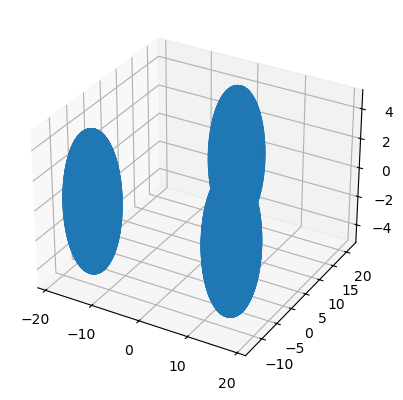

In [1]:
def sphere(res):
    phi, theta = np.mgrid[0:np.pi:complex(res), 0:2*np.pi:complex(res)]
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    return x, y, z
nGrid = 64
from scipy.spatial import Delaunay
import numpy as np
X, Y, Z = np.meshgrid(np.linspace(-(nGrid-1)/2, (nGrid-1)/2, nGrid), np.linspace(-(nGrid-1)/2, (nGrid-1)/2, nGrid), np.linspace(-(nGrid-1)/2, (nGrid-1)/2, nGrid))
QP = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T

P0 = np.random.rand() * 10 + 20
P1 = np.random.rand() * 2.5 + 2.5
tipX, tipY, tipZ = sphere(100)
tipX = tipX.ravel() * P1
tipY = tipY.ravel() * P1
tipZ = tipZ.ravel() * P1
T = np.vstack([np.column_stack([tipX - P0/2, tipY, tipZ]),
                np.column_stack([tipX + P0/2, tipY, tipZ]),
                np.column_stack([tipX, tipY + P0/2*np.sqrt(3), tipZ])])

T[:, 1] -= P0/2*np.sqrt(3)/3
S = Delaunay(T)
indexIntersect = S.find_simplex(QP)
def visualize_3d_volume(volume):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(volume, edgecolor='k')
    plt.show()
mask = indexIntersect!=-1
mask = mask.reshape((nGrid, nGrid, nGrid)).astype(float)
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
mask = gaussian_filter(mask, sigma=1)
visualize_3d_volume(mask)

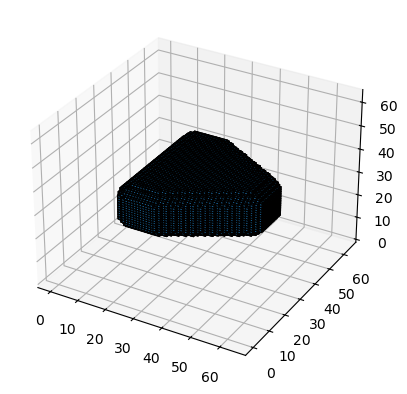

In [2]:
def visualize_3d_volume(volume):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(volume, edgecolor='k')
    plt.show()
mask = indexIntersect!=-1
mask = mask.reshape((nGrid, nGrid, nGrid)).astype(float)
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
mask = gaussian_filter(mask, sigma=1)
visualize_3d_volume(mask)

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


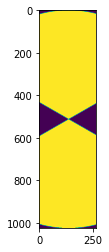

In [5]:
import torch
import math
def mw2d(dim, missing_angle=[30, 30]):
    missing = math.pi / 180.0 * (90.0 - torch.tensor(missing_angle))

    x, y = torch.arange(dim), torch.arange(dim)
    grid_x, grid_y = torch.meshgrid(x, y, indexing="ij")
    grid_x, grid_y = grid_x - dim / 2, grid_y - dim / 2

    theta = torch.zeros((dim, dim))
    theta[grid_x == 0] = math.pi / 2
    theta[grid_x != 0] = torch.abs(torch.atan(grid_y / grid_x))[grid_x != 0]

    mw1 = torch.zeros((dim, dim))
    mw1[
        (grid_x * grid_y > 0)
        & (theta < missing[0])
        & ((grid_x**2 + grid_y**2) <= (dim / 2) ** 2)
    ] = 1
    mw1[
        (grid_x * grid_y < 0)
        & (theta < missing[1])
        & ((grid_x**2 + grid_y**2) <= (dim / 2) ** 2)
    ] = 1
    mw1[grid_y.int() == 0] = 1
    # mw1 = torch.flip(torch.rot90(mw1, k=1, dims=(0, 1)), dims=(0,))
    # plot the mw1
    import matplotlib.pyplot as plt
    plt.imshow(mw1[:,374:640])
    plt.show()

    return mw1

mw=mw2d(1024, missing_angle=[30, 30])[:,384:640]

In [21]:
import matplotlib.pyplot as plt
def plot_density_slice(density_map ):
    fig, ax = plt.subplots()
    # Find a slice through the center
    slice_index = density_map.shape[2] // 2 
    # slice_2d = density_map[: , :, slice_index]
    slice_2d = density_map[: ,slice_index, :]
    # slice_2d = density_map[slice_index,: , :]
    # slice_2d[200:300,:]=100
    # Plot the 2D slice
    ax.imshow(slice_2d, cmap='viridis')
    ax.axis('off')
    # display how the color represents the density
    plt.colorbar(ax.imshow(slice_2d, cmap='viridis'))

    plt.show()
# plot_density_slice(mw)
def plot_fft_slice(density_map):
    slice_index = density_map.shape[1] // 2
    density_map = torch.tensor(density_map)
    # slice_map = density_map[slice_index,:, :]   
    slice_map = density_map[: ,slice_index, :]
    # slice_map = density_map[slice_index,: , :]
    fft_map = torch.fft.fftshift(torch.fft.fft2(slice_map))
    fft_map = torch.log(fft_map.abs() + 1)
    fft_map = fft_map.abs().numpy()
    fig, ax = plt.subplots()
    # Find a slice through the center
    slice_2d = fft_map
    # slice_2d = density_map[slice_index,: , :]
    # slice_2d[200:300,:]=100
    # Plot the 2D slice
    ax.imshow(slice_2d, cmap='viridis')
    ax.axis('off')

    plt.show()

2.6784573
0.91388774
1.6146659


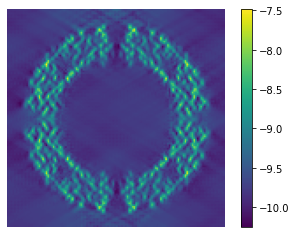

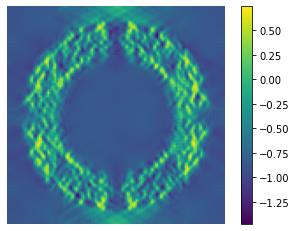

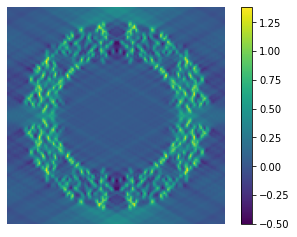

In [28]:
from io_util import read_mrc_data,put_mrc_data
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# # v = read_mrc_data('lmolmap/v.mrc')
# v = binary_volume
# print(v.shape)
# torch_v = torch.tensor(v).to(device)
# mw_shifted = torch.fft.fftshift(mw).to(device)

# out_data = torch.fft.ifft2(mw_shifted * torch.fft.fft2(torch_v.transpose(0,1))).transpose(0,1)
# out_data = out_data.real
# v = out_data.cpu().numpy()
# v = read_mrc_data('../IsoNet/hiv_deconv/TS01-wbp.rec')

v = read_mrc_data('../IsoNet/encoder_corrected_tomos/out_molmap_corrected.mrc')
v_iso = read_mrc_data('../IsoNet/corrected_tomos/out_molmap_corrected.mrc')
vb = read_mrc_data('../IsoNet/molmap/out_molmap.mrc')
import numpy as np
# np.max(v)
print(max(v.flatten()))
print(max(v_iso.flatten()))
print(max(vb.flatten()))

plot_density_slice(v-10)
plot_density_slice(v_iso)
plot_density_slice(vb)

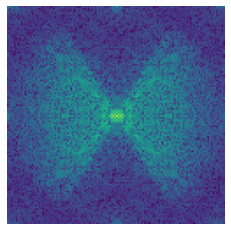

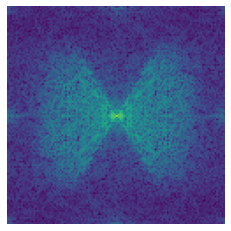

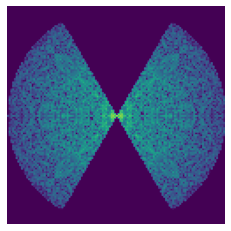

: 

In [29]:
plot_fft_slice(v)
plot_fft_slice(v_iso)
plot_fft_slice(vb)

In [13]:
put_mrc_data(v,'out_spheres.mrc',overwrite=True)
put_mrc_data(binary_volume,'spheres.mrc',overwrite=True)


In [8]:
# First, create a simple dataset
import numpy as np
example_data = np.arange(12, dtype=np.int8).reshape(3, 4)

# Make a new MRC file and write the data to it:
import mrcfile
# with mrcfile.new('tmp.mrc') as mrc:
    # mrc.set_data(example_data)

# The file is now saved on disk. Open it again and check the data:
with mrcfile.open('tmp.mrc') as mrc:
    print(mrc.data)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


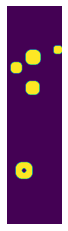

In [4]:
import numpy as np
from scipy.ndimage import gaussian_filter
import random

def generate_hollow_sphere(diameter, density=1.0):
    radius = diameter // 2
    size = diameter + 1  # Add extra space for boundary effects
    center = size // 2

    # Create a 3D grid
    x, y, z = np.indices((size, size, size))
    distance = np.sqrt((x - center)**2 + (y - center)**2 + (z - center)**2)
    
    # Define the sphere
    outer_sphere = (distance <= radius).astype(float)
    inner_radius = radius - 4
    inner_sphere = (distance <= inner_radius).astype(float)
    
    # Create hollow sphere by subtracting the inner sphere from the outer sphere
    hollow_sphere = outer_sphere - inner_sphere
    # Apply a constant density
    density_map = hollow_sphere * density
    
    return density_map

def place_sphere_in_volume(volume, sphere, position):
    """Place a sphere in a 3D volume at a given position."""
    x, y, z = position
    sx, sy, sz = sphere.shape
    vx, vy, vz = volume.shape
    
    # Determine the bounds for placing the sphere
    x_start, y_start, z_start = max(x, 0), max(y, 0), max(z, 0)
    x_end, y_end, z_end = min(x + sx, vx), min(y + sy, vy), min(z + sz, vz)
    
    # Add the sphere into the volume
    volume[x_start:x_end, y_start:y_end, z_start:z_end] += sphere[:x_end-x_start, :y_end-y_start, :z_end-z_start]
    return volume

def check_for_clash(volume, sphere, position):
    """Check if placing a sphere at the given position will result in a clash."""
    x, y, z = position
    sx, sy, sz = sphere.shape
    vx, vy, vz = volume.shape
    
    # Determine the bounds for checking
    x_start, y_start, z_start = max(x, 0), max(y, 0), max(z, 0)
    x_end, y_end, z_end = min(x + sx, vx), min(y + sy, vy), min(z + sz, vz)
    
    # Check if there's any existing sphere in the intended location
    sub_volume = volume[x_start:x_end, y_start:y_end, z_start:z_end]
    clash = np.any(sub_volume > 0)
    
    return clash

def generate_spheres_volume(dimensions, num_spheres, size_range, density=1.0, max_attempts=100):
    volume = np.zeros(dimensions)
    for _ in range(num_spheres):
        diameter = random.randint(*size_range)
        sphere = generate_hollow_sphere(diameter, density)
        
        # Attempt to place the sphere without clashing
        placed = False
        attempts = 0
        while not placed and attempts < max_attempts:
            position = (
                random.randint(0, dimensions[0] - sphere.shape[0]),
                random.randint(0, dimensions[1] - sphere.shape[1]),
                random.randint(0, dimensions[2] - sphere.shape[2])
            )
            if not check_for_clash(volume, sphere, position):
                volume = place_sphere_in_volume(volume, sphere, position)
                placed = True
            attempts += 1
            
        if not placed:
            print(f"Warning: Could not place sphere after {max_attempts} attempts")
    
    return volume

def binarize_volume(volume):
    """Convert the density map into a binary volume."""
    return (volume > 0).astype(int)

def smooth_density_map(density_map, sigma=2.0):
    """Apply Gaussian filter to smooth the density map."""
    smoothed_map = gaussian_filter(density_map, sigma=sigma)
    return smoothed_map

# Parameters
volume_size = (1024, 1024, 256)
num_spheres = 100  # Adjust the number of spheres as needed
size_range = (16, 64)  # Diameter range in pixels

# Generate the volume with spheres avoiding clashes
volume = generate_spheres_volume(volume_size, num_spheres, size_range)

# Optionally smooth the volume
smoothed_volume = smooth_density_map(volume)

# Binarize the volume
binary_volume = binarize_volume(smoothed_volume)

plot_density_slice(binary_volume)

# binary_volume now contains the desired collection of hollow spheres without clashes
